<ipython-input-1-081ab99f4e8f>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


     Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  \
0             0       1   34       20.0              1          1   
1             1       1   61       25.0              3          2   
2             2       1   22       20.0              3          1   
3             3       2   41       15.0              1          1   
4             4       2   34       20.0              2          1   
..          ...     ...  ...        ...            ...        ...   
268         268       2   31        8.0              3          1   
269         269       1   21       15.0              3          3   
270         270       2   19       12.0              3          3   
271         271       2   32       15.0              3          3   
272         272       2   77        6.0              3          3   

     Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  \
0                2.0                        1                  0       1   
1               10.

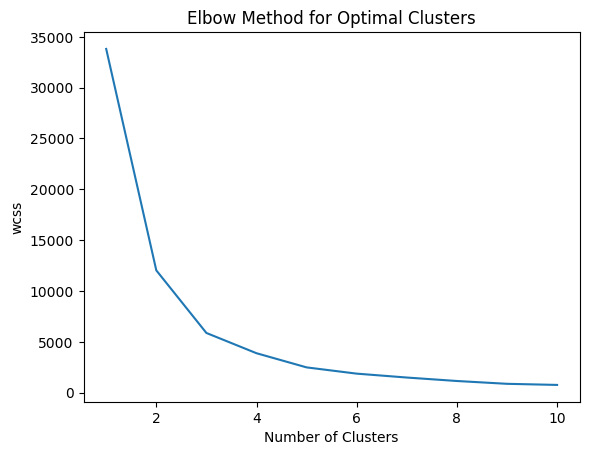

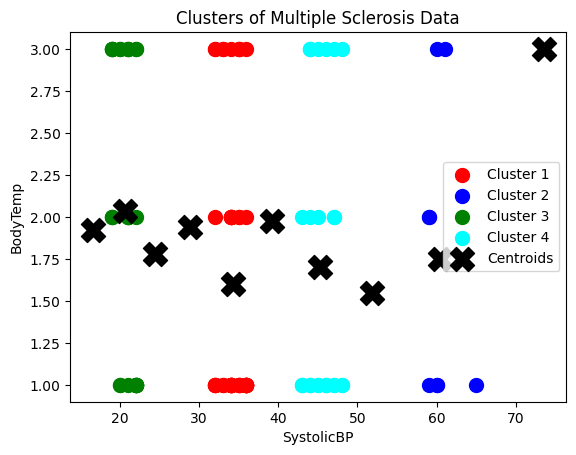

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#Loading the dataset
csv_file=pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
print(csv_file)
X=csv_file.iloc[:,[2,4]].values
print(X)

wcss =[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('wcss')
plt.show()


# Applying K-Means clustering with the optimal number of clusters (k=4)
kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Visualizing the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=100, c='cyan', label='Cluster 4')

# Plotting the centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='black', marker='X', label='Centroids')
plt.title('Clusters of Multiple Sclerosis Data')
plt.xlabel('SystolicBP')
plt.ylabel('BodyTemp')
plt.legend()
plt.show()


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

data=pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
#print(data)

X=data.iloc[:,[2,4]].values
y=data.iloc[:,-1].values
print(X)


X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3, random_state=0)


scale1=StandardScaler()
X_train=scale1.fit_transform(X_train)
X_test=scale1.fit_transform(X_test)

print(X_train)


cl1=LinearSVC(max_iter=100,tol=0.001,loss='hinge')
cl1.fit(X_train, y_train)

y_predict=cl1.predict(X_test)
print(y_predict)


cm=confusion_matrix(y_test, y_predict)
print(cm)



accuracy = accuracy_score(y_test, y_predict)
print(accuracy)


scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
print(X_train_scaled)


[[34  1]
 [61  3]
 [22  3]
 [41  1]
 [34  2]
 [29  1]
 [53  1]
 [24  1]
 [36  1]
 [28  1]
 [60  3]
 [25  1]
 [34  1]
 [36  1]
 [29  1]
 [29  1]
 [29  1]
 [24  1]
 [51  1]
 [36  1]
 [32  3]
 [30  3]
 [50  1]
 [38  1]
 [22  3]
 [34  2]
 [34  2]
 [19  2]
 [19  2]
 [24  2]
 [25  2]
 [27  2]
 [36  1]
 [38  2]
 [23  2]
 [22  1]
 [30  3]
 [37  3]
 [38  2]
 [65  1]
 [39  3]
 [21  2]
 [49  3]
 [35  1]
 [42  1]
 [28  1]
 [41  1]
 [34  1]
 [22  1]
 [32  1]
 [24  1]
 [19  2]
 [33  1]
 [31  2]
 [51  1]
 [19  3]
 [28  1]
 [40  1]
 [28  1]
 [28  2]
 [31  3]
 [34  1]
 [32  2]
 [28  2]
 [48  1]
 [59  2]
 [34  1]
 [32  1]
 [46  1]
 [37  2]
 [46  1]
 [27  2]
 [28  1]
 [16  1]
 [21  2]
 [43  2]
 [47  2]
 [40  1]
 [27  3]
 [34  2]
 [19  3]
 [49  1]
 [45  2]
 [41  1]
 [24  2]
 [28  3]
 [21  2]
 [28  2]
 [40  2]
 [35  2]
 [32  1]
 [24  3]
 [21  1]
 [47  1]
 [34  2]
 [24  1]
 [40  3]
 [24  1]
 [35  1]
 [41  2]
 [32  1]
 [60  1]
 [25  1]
 [55  1]
 [56  1]
 [46  1]
 [15  3]
 [20  3]
 [50  3]
 [36  3]
 [30  3]
 

/lib/python3.12/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


[2 1 1 1 1 1 2 1 2 1 1 2 2 2 1 1 1 2 2 2 1 1 1 1 2 1 1 1 2 2 1 1 1 2 1 1 2
 1 1 2 1 1 2 2 2 1 2 2 1 2 1 1 2 2 2 2 2 2 1 1 2 2 1 2 2 2 1 1 1 2 2 2 1 1
 1 1 2 2 1 1 1 2]
[[20 15]
 [24 23]]
0.524390243902439
[[ 0.7967287  -0.99332726]
 [ 0.88884442 -0.99332726]
 [-0.86135439  0.1565243 ]
 [ 0.42826579 -0.99332726]
 [-0.40077576  1.30637585]
 [-0.49289148 -0.99332726]
 [-1.59828021  1.30637585]
 [-0.49289148 -0.99332726]
 [ 0.33615006  1.30637585]
 [ 0.7967287   0.1565243 ]
 [ 1.16519161 -0.99332726]
 [-0.86135439  0.1565243 ]
 [-0.12442857 -0.99332726]
 [ 1.71788597  1.30637585]
 [-0.03231285  0.1565243 ]
 [ 0.52038152  1.30637585]
 [-0.95347012  1.30637585]
 [-0.03231285 -0.99332726]
 [-0.2165443  -0.99332726]
 [-0.12442857 -0.99332726]
 [-0.03231285 -0.99332726]
 [-0.03231285  0.1565243 ]
 [-0.40077576  1.30637585]
 [-1.69039594  0.1565243 ]
 [ 0.52038152  1.30637585]
 [-0.30866003  1.30637585]
 [ 0.42826579  1.30637585]
 [ 0.15191861 -0.99332726]
 [-1.32193303  1.30637585]
 [ 0.2440343

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data=pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
print(data)

X=data.iloc[:,[2,4]].values
y=data.iloc[:,-1].values
print(X)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.6, random_state=0)

from sklearn.preprocessing import StandardScaler
scale1=StandardScaler()
X_train=scale1.fit_transform(X_train)
X_test=scale1.fit_transform(X_test)

print(X_train)

from sklearn.naive_bayes import GaussianNB
cl1=GaussianNB()
cl1.fit(X_train, y_train)

y_predict=cl1.predict(X_test)
print(y_predict)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_predict)
print(cm)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_predict)
print(accuracy)

from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
X_train_scaled=scale.fit_transform(X_train)
print(X_train_scaled)


     Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  \
0             0       1   34       20.0              1          1   
1             1       1   61       25.0              3          2   
2             2       1   22       20.0              3          1   
3             3       2   41       15.0              1          1   
4             4       2   34       20.0              2          1   
..          ...     ...  ...        ...            ...        ...   
268         268       2   31        8.0              3          1   
269         269       1   21       15.0              3          3   
270         270       2   19       12.0              3          3   
271         271       2   32       15.0              3          3   
272         272       2   77        6.0              3          3   

     Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  \
0                2.0                        1                  0       1   
1               10.

     Unnamed: 0  Gender  Age  Schooling  Breastfeeding  Varicella  \
0             0       1   34       20.0              1          1   
1             1       1   61       25.0              3          2   
2             2       1   22       20.0              3          1   
3             3       2   41       15.0              1          1   
4             4       2   34       20.0              2          1   
..          ...     ...  ...        ...            ...        ...   
268         268       2   31        8.0              3          1   
269         269       1   21       15.0              3          3   
270         270       2   19       12.0              3          3   
271         271       2   32       15.0              3          3   
272         272       2   77        6.0              3          3   

     Initial_Symptom  Mono_or_Polysymptomatic  Oligoclonal_Bands  LLSSEP  \
0                2.0                        1                  0       1   
1               10.

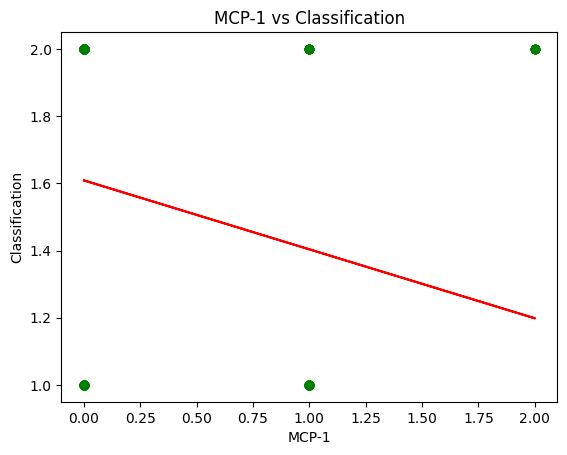

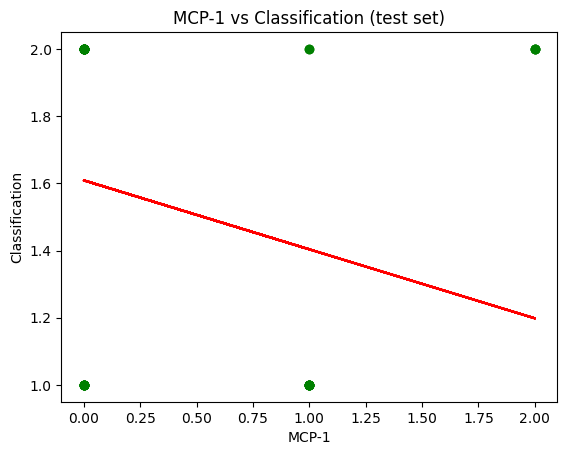

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("conversion_predictors_of_clinically_isolated_syndrome_to_multiple_sclerosis.csv")
print(data)
X=data.iloc[:,8:9].values
print(X)
y=data.iloc[:,-1].values
print(y)
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.15,random_state=0)
print(X_train)
print(x_test)
print(y_train)
print(y_test)
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train, y_train)
y_predict= regressor.predict(x_test)
print("\n The original values=",y_test)
print("\n The predicted values=",y_predict)
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train, regressor.predict(X_train),color='red')
plt.title('MCP-1 vs Classification')
plt.xlabel('MCP-1')
plt.ylabel('Classification')
plt.show()
plt.scatter(x_test,y_test,color='green')
plt.plot(x_test, y_predict,color='red')
plt.title('MCP-1 vs Classification (test set)')
plt.xlabel('MCP-1')
plt.ylabel('Classification')
plt.show()
